In [6]:
import matplotlib.pyplot as plt

import pywt

### Plot Scaling and Wavelet functions for the Wavelets 

Wavelet Wavelet db4
  Family name:    Daubechies
  Short name:     db
  Filters length: 8
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False
Filter bank ([-0.010597401785069032, 0.0328830116668852, 0.030841381835560764, -0.18703481171909309, -0.027983769416859854, 0.6308807679298589, 0.7148465705529157, 0.2303778133088965], [-0.2303778133088965, 0.7148465705529157, -0.6308807679298589, -0.027983769416859854, 0.18703481171909309, 0.030841381835560764, -0.0328830116668852, -0.010597401785069032], [0.2303778133088965, 0.7148465705529157, 0.6308807679298589, -0.027983769416859854, -0.18703481171909309, 0.030841381835560764, 0.0328830116668852, -0.010597401785069032], [-0.010597401785069032, -0.0328830116668852, 0.030841381835560764, 0.18703481171909309, -0.027983769416859854, -0.6308807679298589, 0.7148465705529157, -0.2303778133088965])
dec_lo [-0.010597401785069032, 0.0328830116668852, 0.030841381835560764, -0.1870348

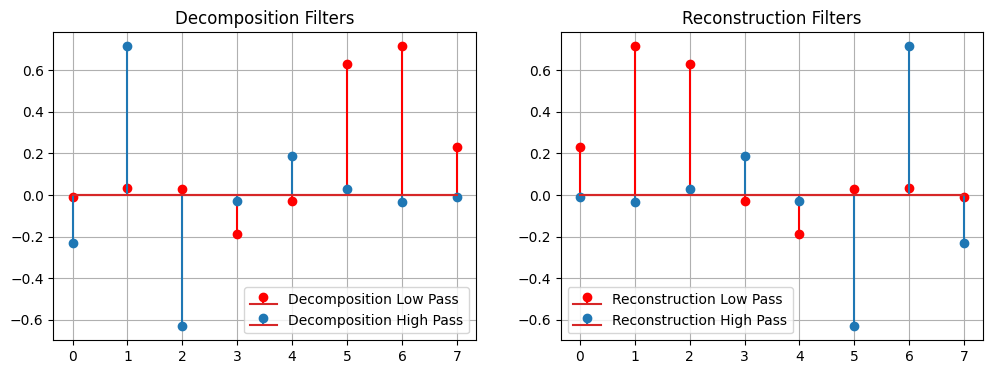

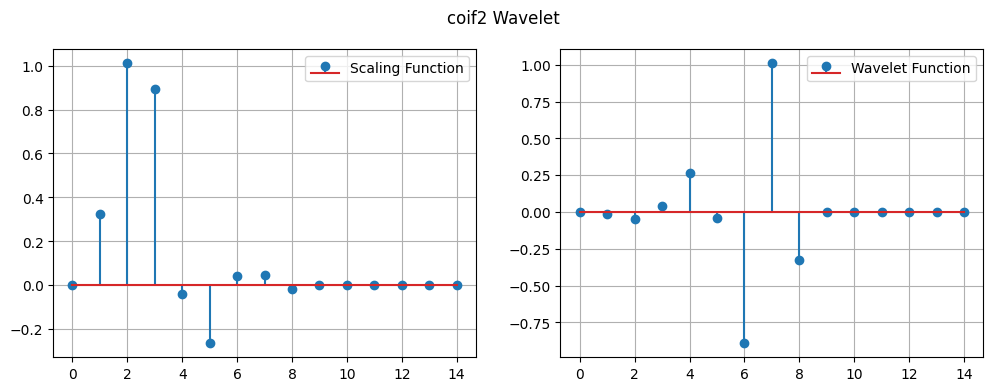

In [33]:
w = pywt.Wavelet('db4')
print("Wavelet", w)
print("Filter bank", w.filter_bank)
print("dec_lo", w.dec_lo)
print("dec_hi", w.dec_hi)
print("rec_lo", w.rec_lo)
print("rec_hi", w.rec_hi)

# plot the decomposition and reconstruction filters
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.stem(w.dec_lo, label="Decomposition Low Pass", linefmt="-r")
plt.stem(w.dec_hi, label="Decomposition High Pass")
plt.legend()
plt.title("Decomposition Filters")
plt.grid(True)

plt.subplot(122)
plt.stem(w.rec_lo, label="Reconstruction Low Pass", linefmt="-r")
plt.stem(w.rec_hi, label="Reconstruction High Pass")
plt.legend()
plt.title("Reconstruction Filters")
plt.grid(True)


phi, psi, x = w.wavefun(level=1)

print("Scaling Coefficients", phi)
print("Detail Coefficients", psi)
print("Number of vanishing moments in detail", w.vanishing_moments_psi)
print("Number of vanishing moments in scale", w.vanishing_moments_phi)

# plot the wavelet as stem plot with linespace
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.stem(phi, label="Scaling Function")
plt.grid()
plt.legend()
plt.subplot(122)
plt.stem(psi, label="Wavelet Function")
plt.legend()
plt.suptitle("coif2 Wavelet")
plt.grid(True)

# Visualizing 2D Wavelets

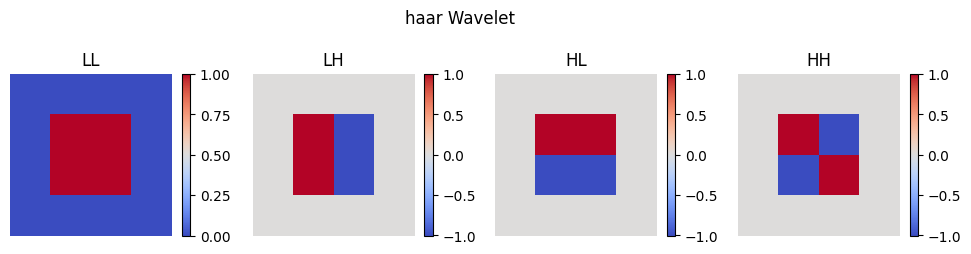

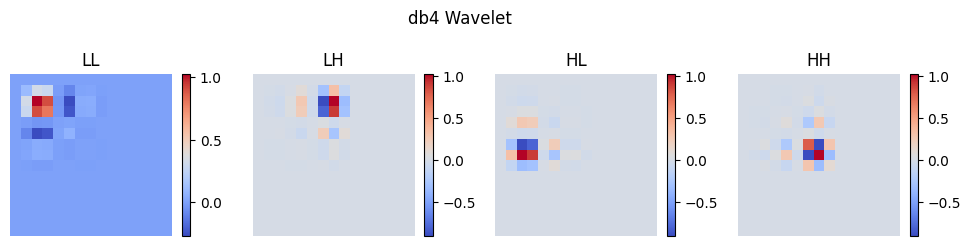

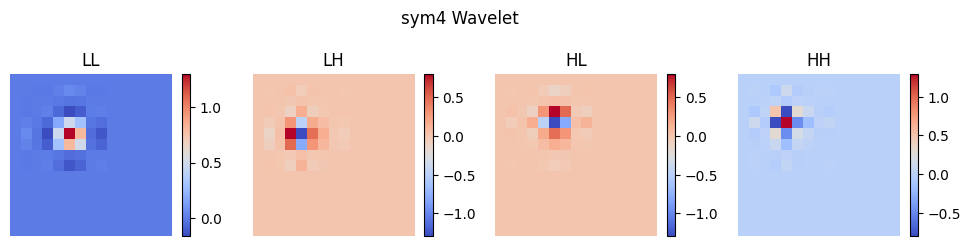

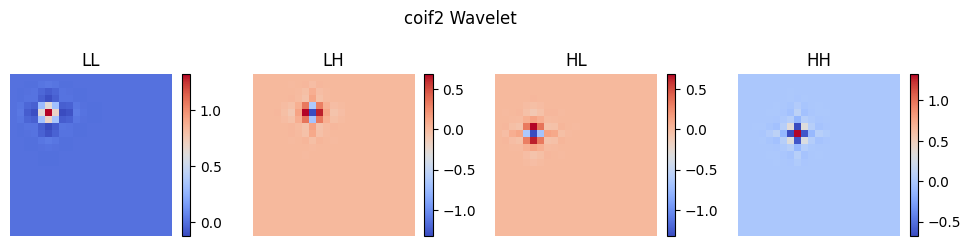

In [40]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

for type in ['haar', 'db4', 'sym4', 'coif2']:
    wavelet = pywt.Wavelet(type)
    phi, psi, x = wavelet.wavefun(level=1)

    # Create a 2D grid
    xx, yy = np.meshgrid(x, x)

    labels = ["LL", "LH", "HL", "HH"]
    plt.figure(figsize=(12, 3))
    i = 0
    for s in [phi, psi]:
        for w in [phi, psi]:
            # Calculate 2D wavelet
            wavelet = np.outer(s, w)

            plt.subplot(1, 4, i + 1)
            plt.imshow(wavelet, cmap='coolwarm', extent=[x.min(), x.max(), x.min(), x.max()])
            plt.title(labels[i])
            plt.xlabel('X')
            plt.colorbar(shrink=0.7)
            plt.ylabel('Y')
            plt.axis('off')

            # # Plot the 3D surface
            # ax = plt.subplot(2, 4, i+5, projection='3d')
            # surf = ax.plot_surface(xx, yy, wavelet, cmap='coolwarm')
            # # ax.set_title(labels[i])
            # ax.set_xlabel('X')
            # ax.set_ylabel('Y')
            # ax.set_zlabel('Amplitude')
            # plt.colorbar(surf, shrink=0.5, aspect=5, label='Amplitude')

            i += 1

    plt.suptitle(f"{type} Wavelet")
    plt.show()

(7, 5)
(7, 7)
(7, 5)
(7, 7)


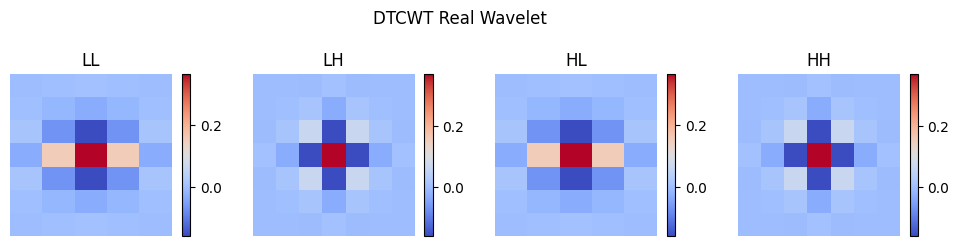

(7, 7)
(7, 5)
(5, 7)
(5, 5)


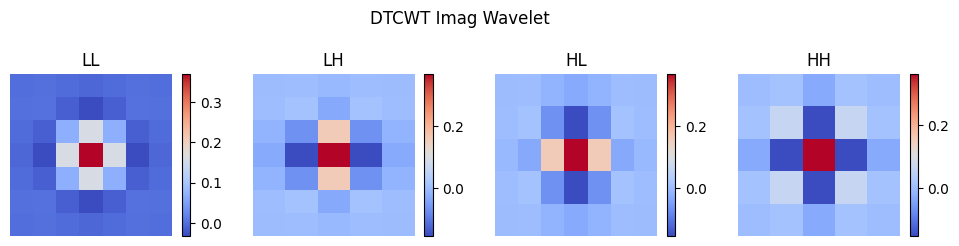

ValueError: operands could not be broadcast together with shapes (7,5) (5,5) 

<Figure size 1200x600 with 0 Axes>

In [72]:
import dtcwt.coeffs

coeefs = dtcwt.coeffs.biort('near_sym_a') # h0, g0, h1, g1
phi0, phi1, psi0, psi1 = [c.reshape(-1,) for c in coeefs]

labels = ["LL", "LH", "HL", "HH"]

tree_a = []
plt.figure(figsize=(12, 3))
i = 0
for s in [psi0, psi0]:
    for w in [phi0, psi0]:
        # Calculate 2D wavelet
        wavelet = np.outer(s, w)
        print(wavelet.shape)
        tree_a.append(wavelet)

        plt.subplot(1, 4, i + 1)
        plt.imshow(wavelet, cmap='coolwarm', extent=[x.min(), x.max(), x.min(), x.max()])
        plt.title(labels[i])
        plt.xlabel('X')
        plt.colorbar(shrink=0.7)
        plt.ylabel('Y')
        plt.axis('off')

        i += 1

plt.suptitle(f"DTCWT Real Wavelet")
plt.show()

tree_b = []
plt.figure(figsize=(12, 3))
i = 0
for s in [phi1, psi1]:
    for w in [phi1, psi1]:
        # Calculate 2D wavelet
        wavelet = np.outer(s, w)
        print(wavelet.shape)
        tree_b.append(wavelet)

        plt.subplot(1, 4, i + 1)
        plt.imshow(wavelet, cmap='coolwarm', extent=[x.min(), x.max(), x.min(), x.max()])
        plt.title(labels[i])
        plt.xlabel('X')
        plt.colorbar(shrink=0.7)
        plt.ylabel('Y')
        plt.axis('off')

        i += 1

plt.suptitle(f"DTCWT Imag Wavelet")
plt.show()

# Wavelts
plt.figure(figsize=(12, 6))
i = 0
for s in [phi1, psi1]:
    for w in [phi1, psi1]:
        # Calculate 2D wavelet
        wavelet1 = tree_a[i] + tree_b[3 - i] 
        wavelet2 = tree_a[i] - tree_b[3 - i] 

        plt.subplot(2, 4, i + 1)
        plt.imshow(wavelet1, cmap='coolwarm', extent=[x.min(), x.max(), x.min(), x.max()])
        plt.title(labels[i])
        plt.xlabel('X')
        plt.colorbar(shrink=0.7)
        plt.ylabel('Y')
        plt.axis('off')

        plt.subplot(2, 4, i + 5)
        plt.imshow(wavelet2, cmap='coolwarm', extent=[x.min(), x.max(), x.min(), x.max()])
        plt.title(labels[i])
        plt.xlabel('X')
        plt.colorbar(shrink=0.7)
        plt.ylabel('Y')
        plt.axis('off')

        i += 1

plt.suptitle(f"DTCWT Wavelets")
plt.show()

3


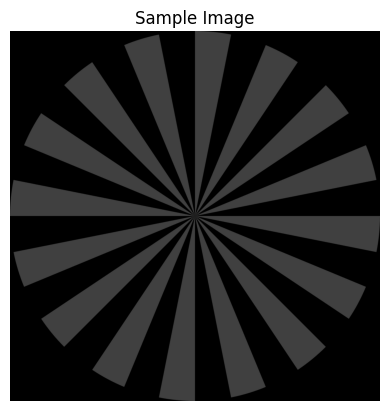

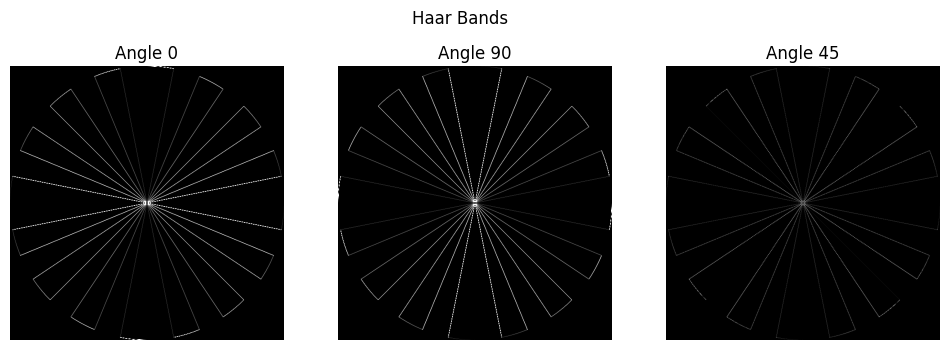

In [71]:
# Load the mandrill image
mandrill = plt.imread("../star.png")
mandrill = mandrill.mean(axis=2)

# Show mandrill
plt.figure(1)
plt.axis('off')
plt.title("Sample Image")
plt.imshow(mandrill, cmap='gray', clim=(0,1))

LL, wavelets_haar = pywt.dwt2(mandrill, 'haar')
print(len(wavelets_haar))

# Show the absolute images for each direction in level 2.
# Note that the 2nd level has index 1 since the 1st has index 0.
labels = [0, 90, 45]
plt.figure(2, figsize=(12, 4))
plt.suptitle("Haar Bands")
for slice_idx in range(len(wavelets_haar)):
    plt.subplot(1, 3, slice_idx + 1)
    plt.axis('off')
    plt.title(f"Angle {labels[slice_idx]}")
    plt.imshow(10 * (np.abs(wavelets_haar[slice_idx])), cmap="gray", clim=(0, 1))

# # Show the phase images for each direction in level 2.
# plt.figure(3)
# for slice_idx in range(mandrill_t.highpasses[1].shape[2]):
#     plt.subplot(1, 6, slice_idx + 1)
#     plt.imshow(np.angle(mandrill_t.highpasses[1][:,:,slice_idx]), cmap="viridis", clim=(-np.pi, np.pi))

# DTCWT Demonstration

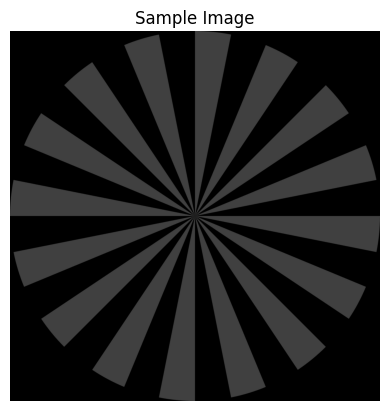

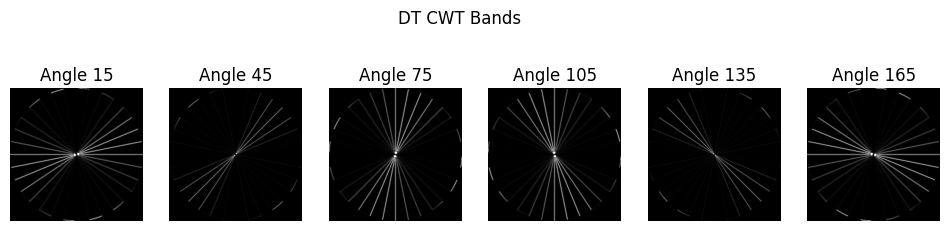

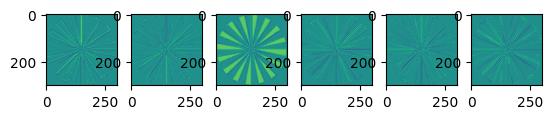

In [8]:
# Load the mandrill image
mandrill = plt.imread("../star.png")
mandrill = mandrill.mean(axis=2)

# Show mandrill
plt.figure(1)
plt.axis('off')
plt.title("Sample Image")
plt.imshow(mandrill, cmap='gray', clim=(0,1))

import dtcwt
import numpy as np
transform = dtcwt.Transform2d()

# Compute two levels of dtcwt with the defaul wavelet family
mandrill_t = transform.forward(mandrill, nlevels=2)

# Show the absolute images for each direction in level 2.
# Note that the 2nd level has index 1 since the 1st has index 0.
labels = [15, 45, 75, 105, 135, 165]
plt.figure(2, figsize=(12, 3))
plt.suptitle("DT CWT Bands")
for slice_idx in range(mandrill_t.highpasses[1].shape[2]):
    plt.subplot(1, 6, slice_idx + 1)
    plt.axis('off')
    plt.title(f"Angle {labels[slice_idx]}")
    plt.imshow(5 * (np.abs(mandrill_t.highpasses[1][:,:,slice_idx])), cmap="gray", clim=(0, 1))



# Show the phase images for each direction in level 2.
plt.figure(3)
for slice_idx in range(mandrill_t.highpasses[1].shape[2]):
    plt.subplot(1, 6, slice_idx + 1)
    plt.imshow(np.angle(mandrill_t.highpasses[1][:,:,slice_idx]), cmap="viridis", clim=(-np.pi, np.pi))

In [9]:
import dtcwt.coeffs


coeefs = dtcwt.coeffs.biort('near_sym_a')
h0, g0, h1, g1 = coeefs

In [47]:
values = [c.reshape(-1,) for c in coeefs]

In [48]:
values

[array([-0.05,  0.25,  0.6 ,  0.25, -0.05]),
 array([-0.01071429, -0.05357143,  0.26071429,  0.60714286,  0.26071429,
        -0.05357143, -0.01071429]),
 array([ 0.01071429, -0.05357143, -0.26071429,  0.60714286, -0.26071429,
        -0.05357143,  0.01071429]),
 array([-0.05, -0.25,  0.6 , -0.25, -0.05])]

In [49]:
import numpy as np
from scipy.signal import hilbert

# Input signal
signal = np.array([-0.05, 0.25, 0.6, 0.25, -0.05])

# Compute the Hilbert Transform
analytic_signal = hilbert(signal)
hilbert_transform = np.imag(analytic_signal)

# Display the results
print("Original Signal: ", signal)
print("Hilbert Transform: ", hilbert_transform)


Original Signal:  [-0.05  0.25  0.6   0.25 -0.05]
Hilbert Transform:  [-1.33803035e-01 -3.56506308e-01  2.22044605e-17  3.56506308e-01
  1.33803035e-01]


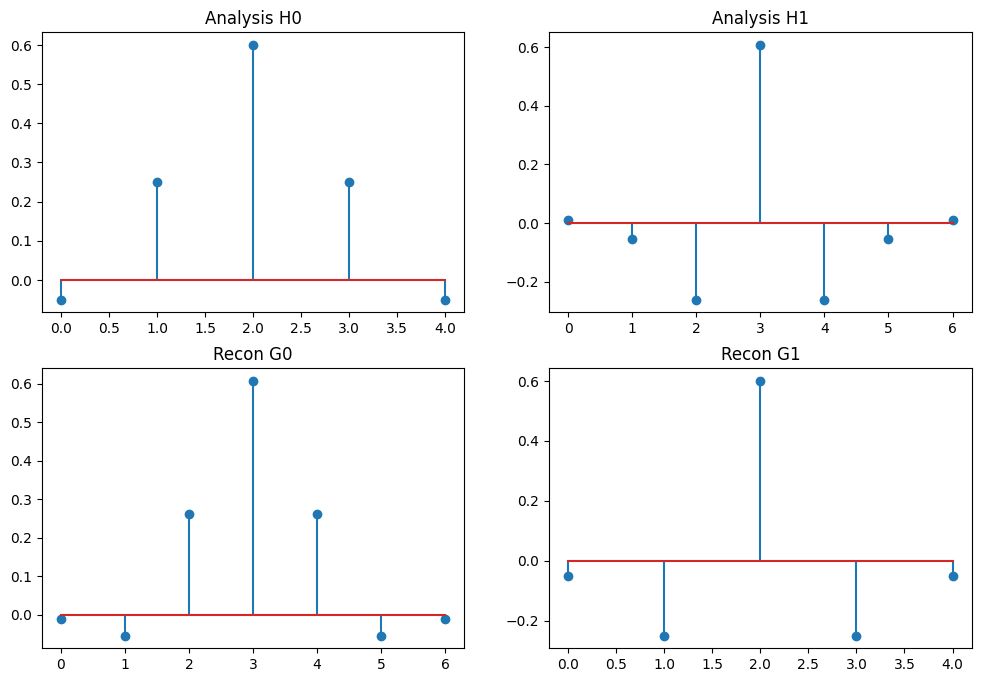

In [10]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.stem(h0)
plt.title("Analysis H0")

plt.subplot(2, 2, 2)
plt.stem(h1)
plt.title("Analysis H1")

plt.subplot(2, 2, 3)
plt.stem(g0)
plt.title("Recon G0")

plt.subplot(2, 2, 4)
plt.stem(g1)
plt.title("Recon G1")

plt.show()

Text(0.5, 1.0, 'Adding 5 tap LP and 7 tap HP')

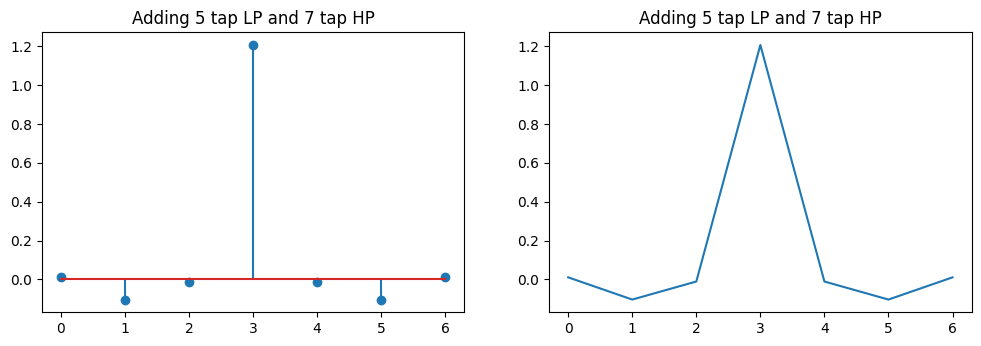

In [13]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
a = np.asarray([0] + list(h0.reshape(-1, )) + [0])
b = h1.reshape(-1)
plt.stem(a + b)
plt.title("Adding 5 tap LP and 7 tap HP")

plt.subplot(2, 2, 2)
plt.plot(a + b)
plt.title("Adding 5 tap LP and 7 tap HP")

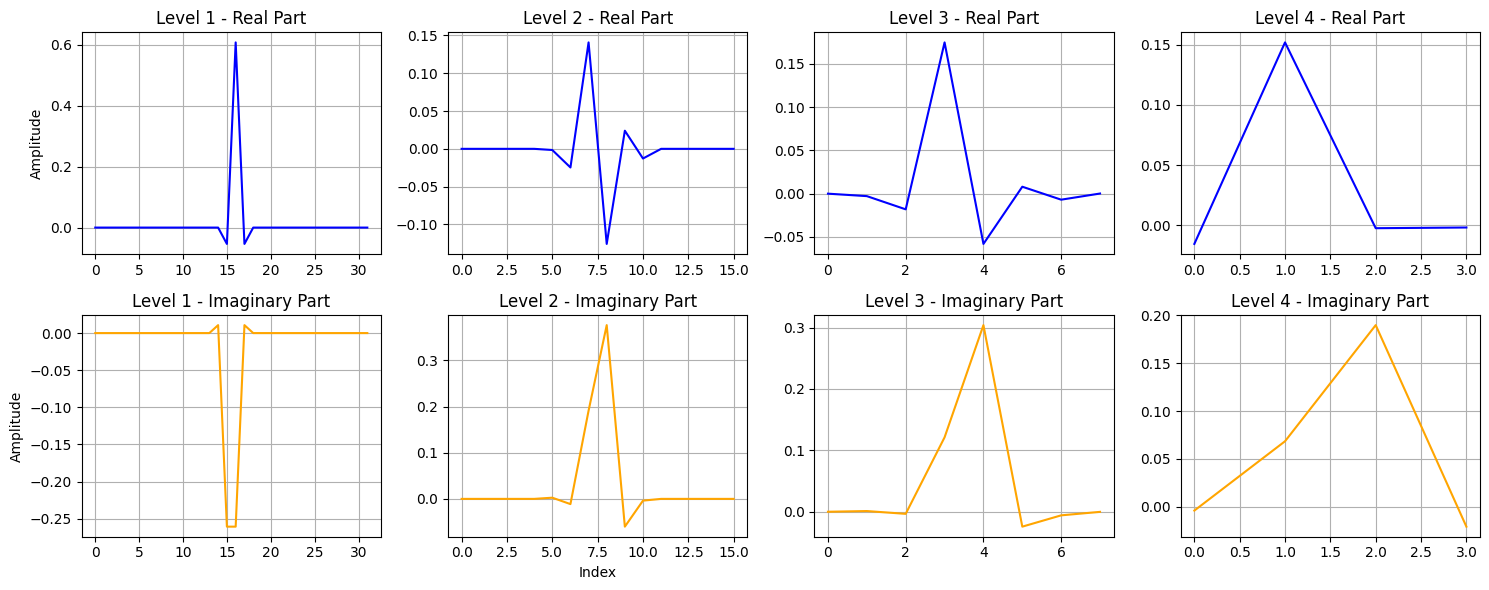

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import dtcwt

# Function to plot the wavelets
def plot_dtcwt_wavelets(levels=3):
    # Create a 1D signal
    signal_length = 64
    signal = np.zeros(signal_length)
    signal[signal_length // 2] = 1  # Impulse signal

    # Perform Dual-Tree Complex Wavelet Transform
    transform = dtcwt.Transform1d()
    wt = transform.forward(signal, nlevels=levels)

    # Plot the real and imaginary parts of wavelets at each level
    fig, axes = plt.subplots(2, levels, figsize=(15, 6))
    for level in range(levels):
        # Extract wavelet coefficients
        wavelet_coeffs = wt.highpasses[level]
        x = np.arange(len(wavelet_coeffs))

        # Plot real part
        axes[0, level].plot(x, wavelet_coeffs.real, label='Real', color='blue')
        axes[0, level].set_title(f'Level {level + 1} - Real Part')
        axes[0, level].grid(True)

        # Plot imaginary part
        axes[1, level].plot(x, wavelet_coeffs.imag, label='Imaginary', color='orange')
        axes[1, level].set_title(f'Level {level + 1} - Imaginary Part')
        axes[1, level].grid(True)

    # Add labels
    axes[0, 0].set_ylabel('Amplitude')
    axes[1, 0].set_ylabel('Amplitude')
    axes[1, 1].set_xlabel('Index')

    plt.tight_layout()
    plt.show()

# Call the function to plot wavelets
plot_dtcwt_wavelets(levels=4)
